# Taller 3: Segmentación

Utilizando únicamente las operaciones vistas hasta el momento, segmente la figura de tal manera que los personajes aparezcan sean segmentados correctamente (en blanco), conservando de la mejor manera la figura original, sin introducir artefactos.  Esta es la imagen original:

In [1]:
# Modificar ruta de las imágenes
PATH = './imagenes/'

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen_amour = cv2.imread(PATH +'amour2.png', cv2.IMREAD_GRAYSCALE)

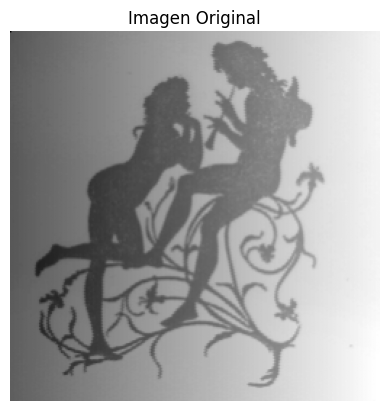

In [6]:
plt.imshow(imagen_amour, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')
plt.show()

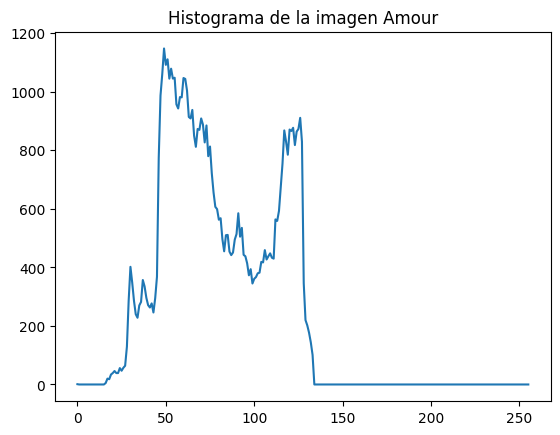

In [7]:
histogram_amour = cv2.calcHist([imagen_amour], [0], None, [256], [0, 256])
plt.plot(histogram_amour)
plt.title('Histograma de la imagen Amour')
plt.show()

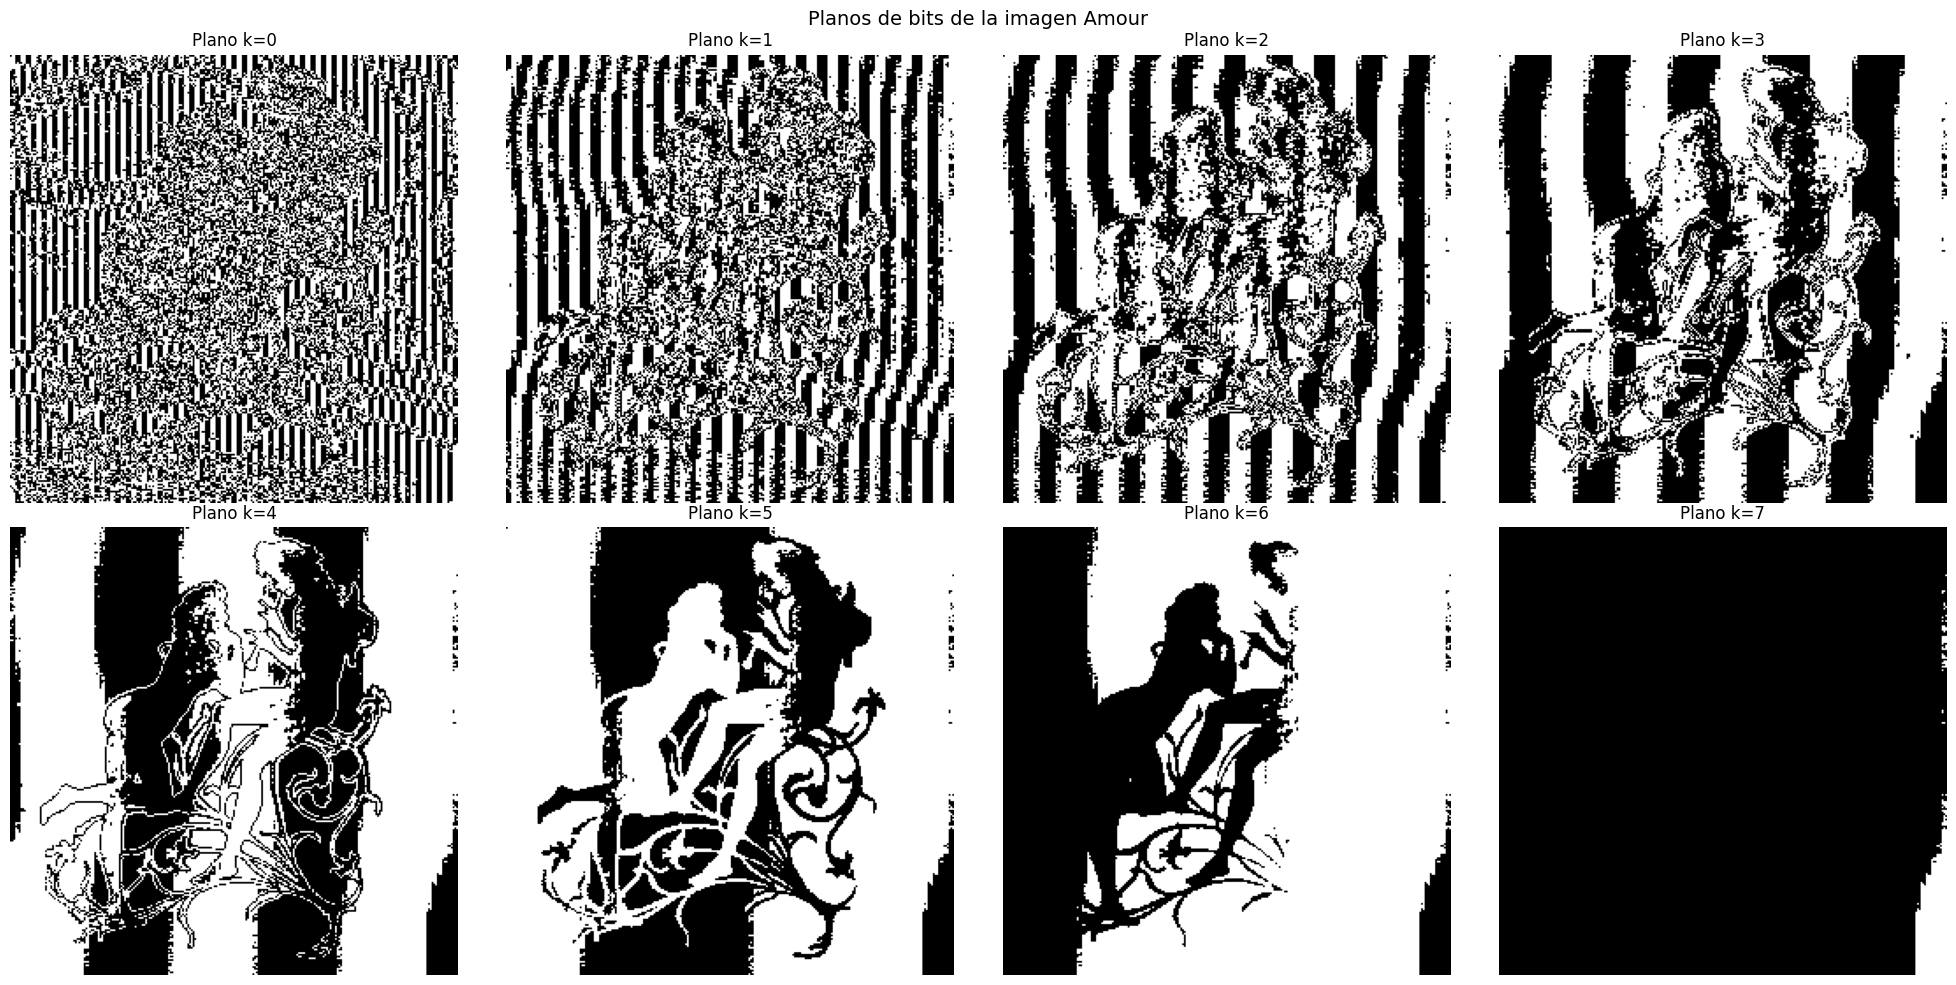

In [ ]:
imagen_amour = cv2.imread(PATH + 'amour2.png', cv2.IMREAD_GRAYSCALE)

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()

for k in range(8):
    plane = np.full(imagen_amour.shape, 2 ** k, np.uint8)
    bit_plane = cv2.bitwise_and(plane, imagen_amour)
    # Normalizar para visualizar
    bit_plane[bit_plane > 0] = 255
    
    
    axs[k].imshow(bit_plane, cmap='gray')
    axs[k].set_title(f'Plano k={k}')
    axs[k].axis('off')

plt.suptitle('Planos de bits de la imagen Amour', fontsize=14)
plt.tight_layout()
plt.show()

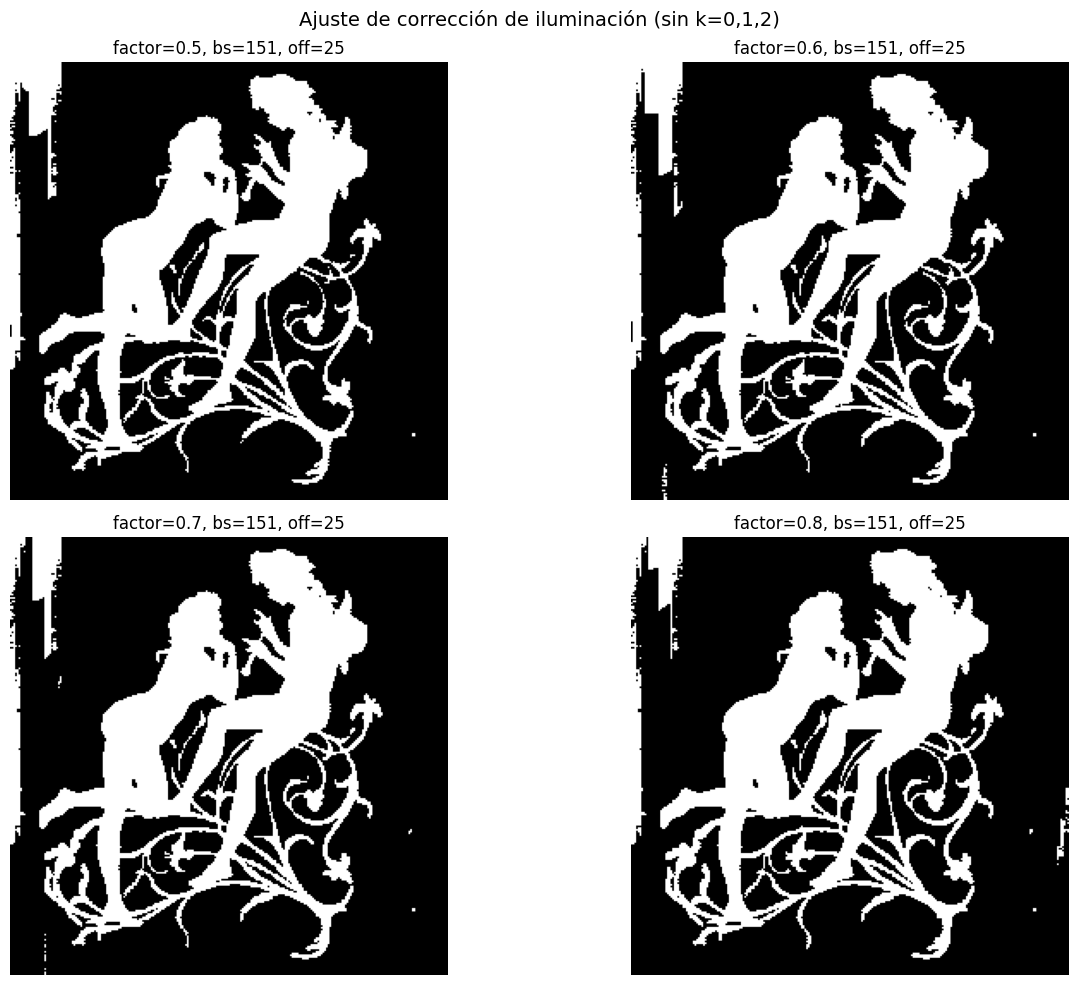

In [84]:
from skimage.filters import threshold_local

imagen_amour = cv2.imread(PATH + 'amour2.png', cv2.IMREAD_GRAYSCALE)
rows, cols = imagen_amour.shape

# 1. Eliminar planos k=0,1,2
img_sin_ruido = imagen_amour.copy()
for k in [0, 1, 2]:
    plane = np.full(imagen_amour.shape, 255 - 2 ** k, np.uint8)
    img_sin_ruido = cv2.bitwise_and(img_sin_ruido, plane)

# 2. Probar diferentes factores de corrección
factores = [0.5, 0.6, 0.7, 0.8]
x = np.arange(cols)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i, f in enumerate(factores):
    factor = 1 + f * (1 - x / cols)
    correccion = np.tile(factor, (rows, 1))
    corregida = np.clip(img_sin_ruido.astype(np.float64) * correccion, 0, 255).astype(np.uint8)
    
    ecualizada = cv2.equalizeHist(corregida)
    min_val = ecualizada.min()
    max_val = ecualizada.max()
    expandida = ((ecualizada - min_val) / (max_val - min_val) * 255).astype(np.uint8)
    
    ti = threshold_local(expandida, block_size=151, method='mean', offset=25)
    binary = (expandida > ti).astype(np.uint8) * 255
    resultado = 255 - binary
    
    axs[i].imshow(resultado, cmap='gray')
    axs[i].set_title(f'factor={f}, bs=151, off=25')
    axs[i].axis('off')

plt.suptitle('Ajuste de corrección de iluminación (sin k=0,1,2)', fontsize=14)
plt.tight_layout()
plt.show()